In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json(open('./tweet_json.txt'), lines=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [2]:
df = df[ ~df['full_text'].str.startswith('RT @')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2168 non-null datetime64[ns]
display_text_range               2168 non-null object
entities                         2168 non-null object
extended_entities                1987 non-null object
favorite_count                   2168 non-null int64
favorited                        2168 non-null bool
full_text                        2168 non-null object
geo                              0 non-null float64
id                               2168 non-null int64
id_str                           2168 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [3]:
df1 = df[['id', 'created_at', 'favorite_count','retweet_count']]

In [4]:
df1 = df1.rename(columns = {'id':'tweet_id'})

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2168 non-null int64
created_at        2168 non-null datetime64[ns]
favorite_count    2168 non-null int64
retweet_count     2168 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 84.7 KB


In [6]:
df_archive = pd.read_csv('./twitter-archive-enhanced.csv')

In [7]:
img_pred_df = pd.read_csv('./image-predictions.tsv', sep='\t')

## Issue 5 Cleanup

In [8]:
img_pred_df = img_pred_df[img_pred_df['p1_dog'] == True]
img_pred_df.shape

(1532, 12)

## Issue 7 Cleanup

In [9]:
df_archive = df_archive[df_archive['rating_denominator'] == 10]
df_archive.shape

(2333, 17)

In [10]:
# Merge dataframes
df1 = df1.merge(img_pred_df, on='tweet_id')
df1.describe()

,tweet_id,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,7.403861e+17,8685.686395,2495.175510,1.214286,0.613617,0.141026,6.179857e-02
std,6.851953e+16,12650.522544,4536.093816,0.576072,0.260356,0.102321,5.262477e-02
min,6.660209e+17,72.000000,11.000000,1.000000,0.044333,0.000023,2.160900e-07
25%,6.779442e+17,2023.750000,578.000000,1.000000,0.390003,0.057123,1.544327e-02
50%,7.149700e+17,4125.500000,1270.000000,1.000000,0.615420,0.126538,4.995100e-02
75%,7.939330e+17,10772.000000,2866.750000,1.000000,0.851578,0.203454,9.514768e-02
max,8.921774e+17,158160.000000,78824.000000,4.000000,0.999956,0.467678,2.734190e-01


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 15 columns):
tweet_id          1470 non-null int64
created_at        1470 non-null datetime64[ns]
favorite_count    1470 non-null int64
retweet_count     1470 non-null int64
jpg_url           1470 non-null object
img_num           1470 non-null int64
p1                1470 non-null object
p1_conf           1470 non-null float64
p1_dog            1470 non-null bool
p2                1470 non-null object
p2_conf           1470 non-null float64
p2_dog            1470 non-null bool
p3                1470 non-null object
p3_conf           1470 non-null float64
p3_dog            1470 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 153.6+ KB


In [12]:
# Drop unnecessary columns
df1 = df1.drop(['jpg_url'], axis=1)

In [13]:
df1.describe()

,tweet_id,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,7.403861e+17,8685.686395,2495.175510,1.214286,0.613617,0.141026,6.179857e-02
std,6.851953e+16,12650.522544,4536.093816,0.576072,0.260356,0.102321,5.262477e-02
min,6.660209e+17,72.000000,11.000000,1.000000,0.044333,0.000023,2.160900e-07
25%,6.779442e+17,2023.750000,578.000000,1.000000,0.390003,0.057123,1.544327e-02
50%,7.149700e+17,4125.500000,1270.000000,1.000000,0.615420,0.126538,4.995100e-02
75%,7.939330e+17,10772.000000,2866.750000,1.000000,0.851578,0.203454,9.514768e-02
max,8.921774e+17,158160.000000,78824.000000,4.000000,0.999956,0.467678,2.734190e-01


In [14]:
# Merge with df_archive
df1 = df1.merge(df_archive, on='tweet_id')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 30 columns):
tweet_id                      1455 non-null int64
created_at                    1455 non-null datetime64[ns]
favorite_count                1455 non-null int64
retweet_count                 1455 non-null int64
img_num                       1455 non-null int64
p1                            1455 non-null object
p1_conf                       1455 non-null float64
p1_dog                        1455 non-null bool
p2                            1455 non-null object
p2_conf                       1455 non-null float64
p2_dog                        1455 non-null bool
p3                            1455 non-null object
p3_conf                       1455 non-null float64
p3_dog                        1455 non-null bool
in_reply_to_status_id         13 non-null float64
in_reply_to_user_id           13 non-null float64
timestamp                     1455 non-null object
source                     

In [15]:
df1 = df1.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 21 columns):
tweet_id              1455 non-null int64
created_at            1455 non-null datetime64[ns]
favorite_count        1455 non-null int64
retweet_count         1455 non-null int64
img_num               1455 non-null int64
p1                    1455 non-null object
p1_conf               1455 non-null float64
p1_dog                1455 non-null bool
p2                    1455 non-null object
p2_conf               1455 non-null float64
p2_dog                1455 non-null bool
p3                    1455 non-null object
p3_conf               1455 non-null float64
p3_dog                1455 non-null bool
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
name                  1455 non-null object
doggo                 1455 non-null object
floofer               1455 non-null object
pupper                1455 non-null object
puppo                 1455 non-nul

In [16]:
from IPython.display import FileLink

df1.to_csv('./twitter_archive_master.csv', index=False)


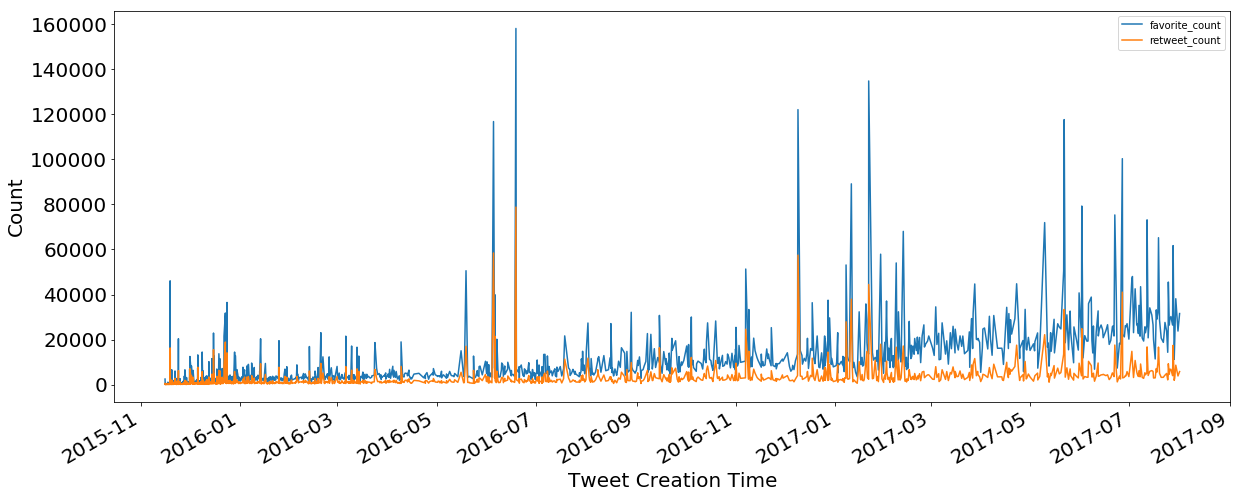

In [17]:
ax = df1.plot(x="created_at", y=["favorite_count", "retweet_count"], figsize=(20,8))
ax.set_xlabel("Tweet Creation Time", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30d745d748>]], dtype=object)

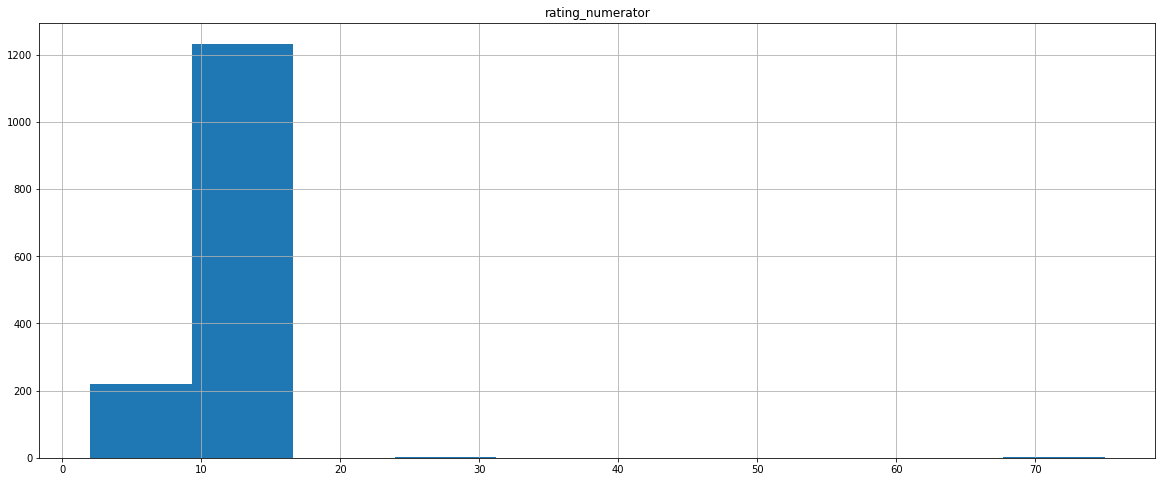

In [18]:
df1.hist(column='rating_numerator', figsize=(20,8))

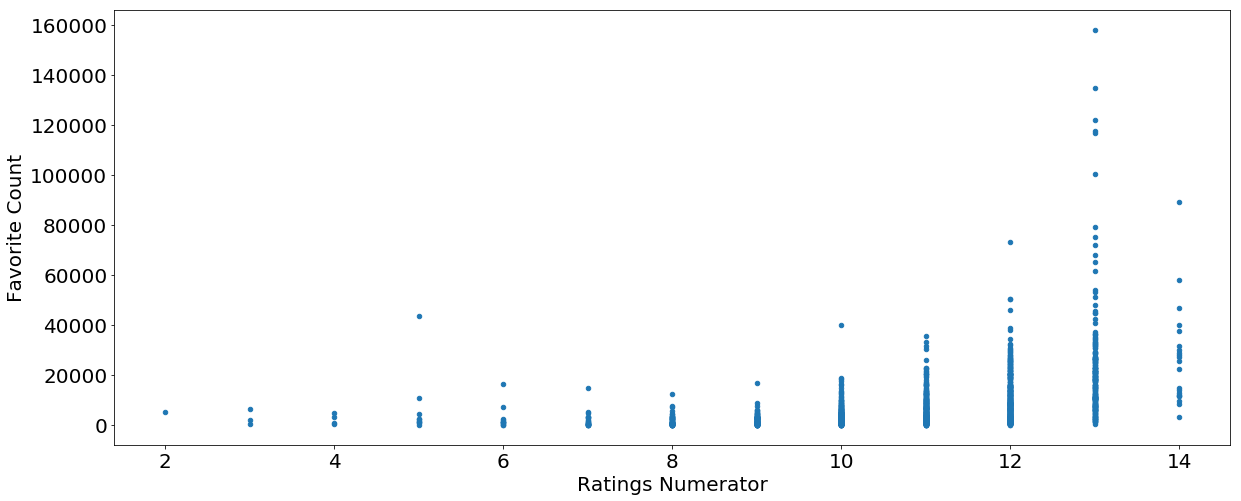

In [19]:
# Create a tmp df with rating < 20
tmp_df = df1[df1['rating_numerator'] < 20]
ax = tmp_df.plot.scatter(x='rating_numerator', y='favorite_count', figsize=(20,8))

ax.set_xlabel("Ratings Numerator", fontsize=20)
ax.set_ylabel("Favorite Count", fontsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)

plt.show()

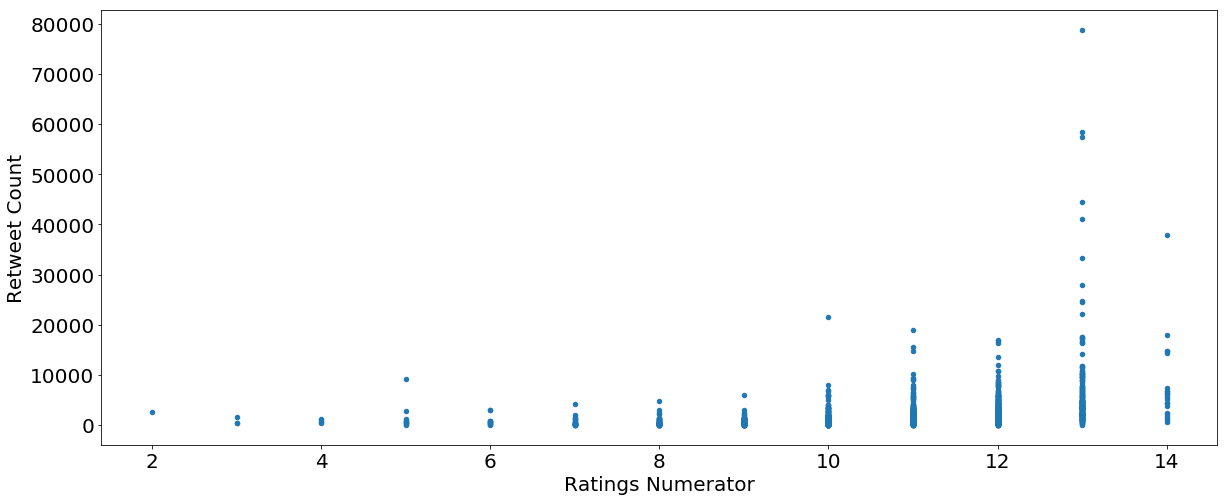

In [20]:
# Create a tmp df with rating < 20
tmp_df = df1[df1['rating_numerator'] < 20]
ax = tmp_df.plot.scatter(x='rating_numerator', y='retweet_count', figsize=(20,8))

ax.set_xlabel("Ratings Numerator", fontsize=20)
ax.set_ylabel("Retweet Count", fontsize=20)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)

plt.show()

In [21]:
# Find Popular dogs by Favorite Count
tmp_df = df1.groupby(df1['p1']).sum()
tmp_df[['favorite_count']].sort_values(by='favorite_count', ascending=False).head(10)

,favorite_count
p1,
golden_retriever,1553046.0
Labrador_retriever,993180.0
Pembroke,939387.0
Chihuahua,651326.0
Samoyed,485212.0
French_bulldog,441876.0
chow,383937.0
pug,295354.0
cocker_spaniel,291665.0


In [22]:
# Find Popular dogs by Retweet Count
tmp_df = df1.groupby(df1['p1']).sum()
tmp_df[['retweet_count']].sort_values(by='retweet_count', ascending=False).head(10)

,retweet_count
p1,
golden_retriever,437102.0
Labrador_retriever,312286.0
Pembroke,251705.0
Chihuahua,203374.0
Samoyed,156420.0
French_bulldog,108489.0
chow,105893.0
Pomeranian,96782.0
cocker_spaniel,89359.0


In [23]:
# Find Popular dogs by ratings
tmp_df = df1.groupby(df1['p1']).sum()
tmp_df[['rating_numerator']].sort_values(by='rating_numerator', ascending=False).head(10)

,rating_numerator
p1,
golden_retriever,1561.0
Pembroke,1007.0
Labrador_retriever,998.0
Chihuahua,846.0
pug,553.0
Pomeranian,489.0
chow,476.0
Samoyed,458.0
toy_poodle,410.0


In [24]:
tmp_df = df1.groupby(df1['p1'].str.lower()).count()['tweet_id'].sort_values(ascending=False)
tmp_df.head(10)

p1
golden_retriever      135
labrador_retriever     90
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
pomeranian             38
toy_poodle             37
malamute               29
Name: tweet_id, dtype: int64

In [25]:
tmp_df = df1.groupby(df1['p1']).count()['tweet_id'].sort_values(ascending=False)
tmp_df.head(10)

p1
golden_retriever      135
Labrador_retriever     90
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             37
malamute               29
Name: tweet_id, dtype: int64

In [26]:
tmp_df = df1.groupby(df1['name']).count()['tweet_id'].sort_values(ascending=False)
tmp_df.head(10)

name
None       352
a           42
Cooper      10
Oliver       9
Charlie      9
Tucker       8
Lucy         7
Sadie        7
Daisy        7
Penny        7
Name: tweet_id, dtype: int64

In [27]:
for type in [ 'doggo', 'floofer', 'pupper', 'puppo' ]:
    type_count = df1[ df1[type] == type].count()['tweet_id']
    print(type,type_count)

doggo 57
floofer 8
pupper 152
puppo 20
